## Importing the libraries

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sys import stdout
from scipy.signal import savgol_filter

import sklearn
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

## Importing dataset and pre-processing

In [3]:
# Importing the Dataset
df = pd.read_excel('Krishnakant.xlsx')
df.head(5)

,Sample,Position,Sand (%),Clay (%),Silt (%),pH,EC,CEC (me/100g ),Nitrogen (%),Carbon (%),...,2441 nm,2442 nm,2443 nm,2444 nm,2445 nm,2446 nm,2447 nm,2448 nm,2449 nm,2450 nm
0,Ro-Cm 1,summit/shoulder,18.968413,29.052379,51.979208,7.52,735.0,17.7,0.407380,4.670,...,0.247883,0.247550,0.247100,0.246550,0.246282,0.246390,0.246317,0.245853,0.245315,0.244805
1,Ro-Cm2,toeslope/alluvial valley,16.952609,31.457708,51.589682,7.45,836.0,13.6,0.355190,4.210,...,0.301488,0.300850,0.300045,0.299090,0.298632,0.298825,0.298708,0.297913,0.296975,0.296092
2,Ro-Cm 3,toeslope/alluvial valley,14.901961,39.079632,46.018407,7.25,807.0,18.5,0.213470,2.770,...,0.213490,0.213220,0.212668,0.211877,0.211523,0.211728,0.211718,0.211230,0.210608,0.209930
3,Ro-Cm 4,summit/shoulder,10.811136,38.718205,50.470659,6.97,1013.0,22.1,0.412700,4.890,...,0.173638,0.173185,0.172535,0.171687,0.171253,0.171340,0.171240,0.170682,0.170075,0.169600
4,Ro-Cm 5,toeslope/alluvial valley,12.866293,39.095276,48.038431,7.46,657.0,15.1,0.182075,3.075,...,0.265275,0.264785,0.264370,0.264012,0.263775,0.263703,0.263480,0.263002,0.262398,0.261580


In [45]:
# Separating X and Y variables
print(df.iloc[:5,:15])
x = np.array(df.iloc[:,11: ])
# y = df.iloc[:,5:11]
y = np.array(df.iloc[:,8]).reshape(-1,1)
# x[:5] # Checking the x variables
# y[:5] # checking the y variables

    Sample                  Position   Sand (%)   Clay (%)   Silt (%)    pH  \
0  Ro-Cm 1           summit/shoulder  18.968413  29.052379  51.979208  7.52   
1   Ro-Cm2  toeslope/alluvial valley  16.952609  31.457708  51.589682  7.45   
2  Ro-Cm 3  toeslope/alluvial valley  14.901961  39.079632  46.018407  7.25   
3  Ro-Cm 4           summit/shoulder  10.811136  38.718205  50.470659  6.97   
4  Ro-Cm 5  toeslope/alluvial valley  12.866293  39.095276  48.038431  7.46   

      EC   CEC (me/100g )  Nitrogen (%)  Carbon (%)    LOI (%)    450 nm  \
0   735.0            17.7      0.407380       4.670  11.754661  0.113870   
1   836.0            13.6      0.355190       4.210  11.701935  0.136205   
2   807.0            18.5      0.213470       2.770   9.840081  0.089935   
3  1013.0            22.1      0.412700       4.890  14.513499  0.079830   
4   657.0            15.1      0.182075       3.075   7.625771  0.145620   

    451 nm     452 nm    453 nm  
0  0.114185  0.114507  0.114767  


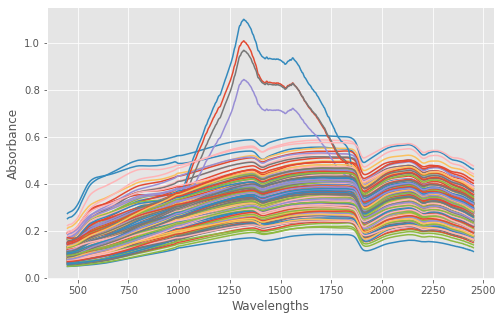

In [46]:
# Plotting the spectrum
W = np.arange(450,2451)
fig = plt.figure(figsize=(8,5))
plt.style.use('ggplot')
plt.plot(W, x.T, label='Absorbance plot')
plt.xlabel('Wavelengths')
plt.ylabel('Absorbance')
plt.show()

In [47]:
# Removing the samples with different absorbance plot
li = []
for i in range(len(x)):
    if x[i,875]>0.8:
        li.append(i)
x = np.delete(x,li,0)
y = np.delete(y,li,0)
# print(x.shape,y.shape)

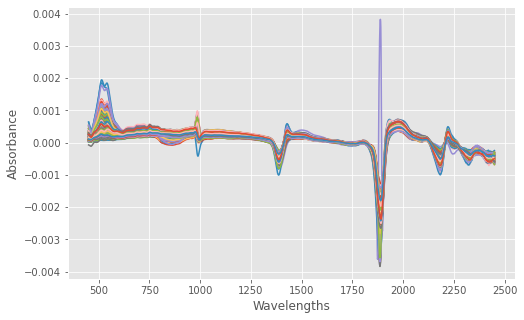

In [49]:
# Plotting the spectrum
x1 = savgol_filter(x, 21, polyorder=2, deriv=1) # Finding the first order Derivative
x2 = savgol_filter(x, 21, polyorder=2, deriv=2) # Finding the second order Derivative

W = np.arange(450,2451)
fig = plt.figure(figsize=(8,5))
plt.style.use('ggplot')
plt.plot(W, x1.T, label='Absorbance plot')
plt.xlabel('Wavelengths')
plt.ylabel('Absorbance')
plt.show()

In [50]:
# Dividing into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
# # Scaling X Variables
# scale_x = StandardScaler()
# x_train = scale_x.fit_transform(x_train)
# x_test = scale_x.transform(x_test)

# # Scaling Y variables
# scale_y = StandardScaler()
# y_train = scale_y.fit_transform(y_train)
# y_test = scale_y.transform(y_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# # np.max(x_train[:,2])

(222, 2001) (74, 2001) (222, 1) (74, 1)


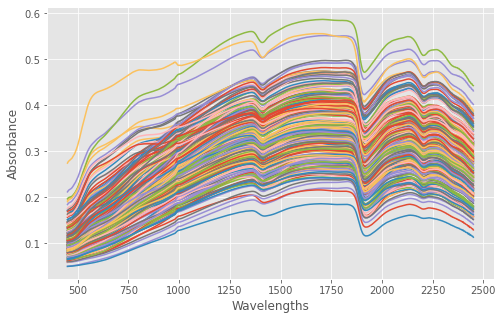

In [51]:
# Plotting the spectrum
W = np.arange(450,2451)
fig = plt.figure(figsize=(8,5))
plt.style.use('ggplot')
plt.plot(W, x_train.T, label='Absorbance plot')
plt.xlabel('Wavelengths')
plt.ylabel('Absorbance')
plt.show()

# Creating a model

In [56]:
# Creating a pipeline
from sklearn.linear_model import Ridge

# PLSRegression(max_iter=9*(10**8),scale=True)
# Ridge(random_state=0)
pipeline = make_pipeline(StandardScaler(), PLSRegression(max_iter=9*(10**8),scale=True))
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('plsregression', PLSRegression(max_iter=900000000))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'plsregression': PLSRegression(max_iter=900000000),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'plsregression__copy': True,
 'plsregression__max_iter': 900000000,
 'plsregression__n_components': 2,
 'plsregression__scale': True,
 'plsregression__tol': 1e-06}

In [57]:
# Declaring the hyperparameter to be tuned
hyperparameter = {'verbose': [0],
                  'plsregression__n_components':np.arange(2,41)}
# hyperparameter = {'ridge__alpha':[0.001,0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 4, 5, 7, 10, 50, 100]}

In [63]:
rmse = sklearn.metrics.get_scorer('neg_root_mean_squared_error')
model = GridSearchCV(pipeline, hyperparameter, cv=5, n_jobs=4,pre_dispatch='2*n_jobs',return_train_score=True)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('R2 score is:',r2_score(y_test, y_pred))
print('Mean Squared Error is:', mean_squared_error(y_test, y_pred))

R2 score is: 0.7752444264395906
Mean Squared Error is: 0.002380847597419719


In [64]:
print("model.best_params_:",model.best_params_)
print('model.best_index_:',model.best_index_)
print("model.best_score_:",model.best_score_)
# print("model.cv_results_:",model.cv_results_)
model.cv_results_

model.best_params_: {'plsregression__n_components': 23, 'verbose': 0}
model.best_index_: 21
model.best_score_: 0.7707218682077002


{'mean_fit_time': array([0.0860837 , 0.13136921, 0.1046278 , 0.11399746, 0.11887431,
        0.12375464, 0.15088902, 0.17138534, 0.17197022, 0.16904416,
        0.18446522, 0.20691252, 0.2199883 , 0.21258974, 0.23267798,
        0.26937804, 0.25258756, 0.26547294, 0.3140779 , 0.3095891 ,
        0.33984256, 0.3794661 , 0.36014199, 0.3956697 , 0.35760546,
        0.41206346, 0.3927454 , 0.40621271, 0.39488678, 0.41870332,
        0.42612324, 0.44349518, 0.46437807, 0.47706189, 0.4682847 ,
        0.49892602, 0.49893198, 0.51357222, 0.47667785]),
 'std_fit_time': array([0.01766068, 0.03820101, 0.01051792, 0.01181349, 0.01075438,
        0.00532809, 0.00824912, 0.01894174, 0.01542303, 0.00514383,
        0.00684502, 0.01350992, 0.01775129, 0.00709585, 0.01350673,
        0.00595435, 0.00886787, 0.01536904, 0.01887242, 0.0201461 ,
        0.02798517, 0.03278529, 0.0294035 , 0.03028326, 0.01133021,
        0.0343648 , 0.02038437, 0.01613352, 0.01878046, 0.00954225,
        0.01880402, 0.018

## Using ridgeCV for cross validation

In [65]:
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas=[0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], normalize=True,\
                    store_cv_values=True, scoring=rmse)
ridge_reg.fit(x_train, y_train)
print(ridge_reg.score(x_train, y_train))
y_pred_ridge = ridge_reg.predict(x_test)

print('R2 score is:',r2_score(y_test, y_pred_ridge))
print('Mean Squared Error is:', mean_squared_error(y_test, y_pred_ridge))

0.9508368422546313
R2 score is: 0.8067566533002015
Mean Squared Error is: 0.002047036922908168


In [66]:
print("ridge_reg.alpha_:",ridge_reg.alpha_)
print("ridge_reg.coef_:",ridge_reg.coef_)

ridge_reg.alpha_: 1e-05
ridge_reg.coef_: [[-2.97996324  0.56812746  9.06501591 ...  2.95892948 -0.62345541
   1.08769745]]


## Old PLS regression code

Completed no of components = 40
optim number of components are: 24


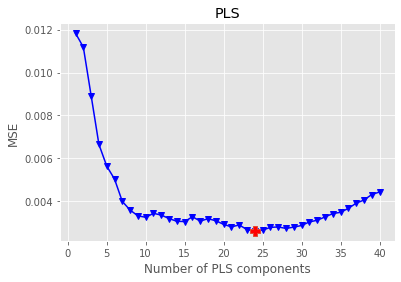

R2 Score: 0.9423857359774933 
R2 Score CV: 0.8093986142753408 
MSE PLS: 0.0008478915792086818 
MSE PLS CV: 0.00280502255271911


In [69]:
# PLS regression
def PLSreg(x_train, y_train, n_comp, plot_components = True):
    mse_PLS = []; mse_CV = []
    for i in range(1,n_comp+1):
        pls = PLSRegression(n_components=i, max_iter=9*(10**8), scale=False)
#         pls.fit(x_train, y_train)
#         y_pred = pls.predict(x_train)
        y_cv = cross_val_predict(pls, x_train, y_train, cv=x_train.shape[0],n_jobs=4, verbose=0)

#         r2_pls = r2_score(y_train, y_pred)
#         r2_cv = r2_score(y_train, y_cv)
#         mse_pls = mean_squared_error(y_train, y_pred)
#         mse_cv = mean_squared_error(y_train, y_cv)
#         mse_PLS.append(mean_squared_error(y_train, y_pred))
        mse_CV.append(mean_squared_error(y_train, y_cv))
        stdout.write("\rCompleted no of components = %d" % i)
        stdout.flush()
        
    n_comp_optim = np.argmin(np.array(mse_CV))
    print('\noptim number of components are:', n_comp_optim+1)
    component = range(1,n_comp+1)
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse_CV), '-v', color = 'blue', mfc='blue')
            plt.plot(component[n_comp_optim], np.array(mse_CV)[n_comp_optim], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
    
    pls_opt = PLSRegression(n_components=n_comp_optim+1, max_iter=9*(10**8), scale=False)
    pls_opt.fit(x_train, y_train)
    y_pred = pls_opt.predict(x_train)
    y_cv = cross_val_predict(pls_opt, x_train, y_train, cv=10,n_jobs=4, verbose=0)
    r2_pls = r2_score(y_train, y_pred)
    r2_cv = r2_score(y_train, y_cv)
    mse_pls = mean_squared_error(y_train, y_pred)
    mse_cv = mean_squared_error(y_train, y_cv)
    print('R2 Score:',r2_pls,'\nR2 Score CV:', r2_cv,'\nMSE PLS:', mse_pls, '\nMSE PLS CV:', mse_cv)
    return (pls_opt, n_comp_optim+1)

pls_opt, n_comp = PLSreg(x_train, y_train, 40)

In [68]:
def PLS_testing(pls, x_test, y_test):
    y_pred = pls.predict(x_test)
#     y_cv = cross_val_predict(pls, x_test)
    r2_value = r2_score(y_test, y_pred)
    mse_value = mean_squared_error(y_test, y_pred)
    print('R2 score is:',r2_value, '\nMSE value is:', mse_value)
    y_table = np.concatenate((y_pred, y_test), axis = 1)
    print(pd.DataFrame(y_table, columns=['Y_pred', 'Y_test']).head())
    return(y_pred)

y_pred = PLS_testing(pls_opt, x_test, y_test)

R2 score is: 0.824345314872659 
MSE value is: 0.001860719306916507
     Y_pred   Y_test
0  0.321937  0.35568
1  0.043636  0.08498
2  0.293241  0.25649
3  0.253558  0.24526
4  0.363458  0.36752
